In [1]:
from quests_data import *

from ase.io import read
from quests.entropy import perfect_entropy, get_bandwidth
from quests.descriptor import descriptor_pbc, get_descriptors
from quests.tools.plotting import savefig, COLORS

In [2]:
ROOT = "../data/A08-Denoiser"
dsets = {
    "fcc": read(f"{ROOT}/k0.1-r3.2-fcc340.cna-labeled.extxyz", index=":"),
    "bcc": read(f"{ROOT}/k0.1-r3.2-bcc340.cna-labeled.extxyz", index=":"),
    "hcp": read(f"{ROOT}/k0.1-r3.2-hcp340.cna-labeled.extxyz", index=":"),
    "liq": read(f"{ROOT}/k0.1-r3.2-liq150.cna-labeled.extxyz", index=":"),
}

## Production values

In [3]:
entropies = []

for name, dset in tqdm.tqdm(dsets.items()):
    for frame, atoms in enumerate(dset):
        x = get_descriptors([atoms])

        # the bandwidth is chosen as a higher value
        # because the copper is at high pressure
        H = perfect_entropy(x, h=0.038)
        n = x.shape[0]
        
        entropies.append({
            "name": name,
            "frame": frame,
            "n": n,
            "logn": np.log(n),
            "H": H,
        })

df = pd.DataFrame(entropies)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.21it/s]


In [4]:
df.pivot(index="frame", values="H", columns="name")

name,bcc,fcc,hcp,liq
frame,,,,
0,2.921975,2.755661,2.766118,3.426215
1,1.415319,0.826901,0.733884,2.887592
2,0.596571,0.191862,0.089315,2.780589
3,0.178722,0.058833,0.025694,2.782420
4,0.059553,0.033307,0.013354,2.769811
5,0.017769,0.022136,0.008512,2.766328
6,0.005234,0.016232,0.006560,2.752556
7,0.002623,0.013138,0.005981,2.754901
8,0.002273,0.011833,0.005923,2.757193


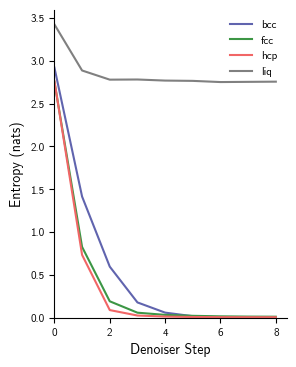

In [5]:
fig, ax = plt.subplots(figsize=(3, 4))

for phase, grp in df.groupby("name"):
    ax.plot(grp["frame"], grp["H"], label=phase, color=COLORS.get(phase, COLORS["other"]))

ax.set_xlabel("Denoiser Step")
ax.set_ylabel("Entropy (nats)")
ax.set_xticks([0, 2, 4, 6, 8])
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.legend(frameon=False)

# savefig(fig, "01-x-denoiser.pdf")
plt.show()